___
# Ciência dos Dados - PROJETO 1

## Luciana Cocito Alves de Freitas
___

## Diferença salarial de gênero, com pessoas de 24 à 60 anos, nas regiões de maior e menor renda do Brasil.

___
## Introdução

Esse projeto tem como finalidade analisar a existência de desigualdade salarial entre homens e mulheres, e, a partir disso, mostrar sua relação com o ensino e as regiões de maior e menor renda no Brasil, entre pessoas de 24 à 60 anos, no decorrer de 4 anos (2011-2015).

Toda a comparação foi feita baseada na faixa de valores de salário mínimo para os diferentes anos analisados (2011 = 545, 2015 = 788 reais).

___
## Filtros da base de dados

In [55]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import arange

In [56]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\lucia\OneDrive\Documentos\GitHub\CD DP\P1


In [57]:
#PNAD 2011

dado = pd.read_csv("PES2011csv.zip", compression = "zip", header = 0, sep = ",", quotechar = '"')
dado.head()

,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2011,11,11000000.0,1,1,2,25,12,1961,49,...,4.0,1.000000e+12,99.0,2,1.0,2.0,2.0,1.0,1.000000e+12,20100000.0
1,2011,11,11000000.0,1,2,4,1,4,1978,33,...,4.0,1.000000e+12,99.0,6,2.0,NaN,NaN,2.0,1.000000e+12,20100000.0
2,2011,11,11000000.0,1,3,4,15,6,1996,15,...,4.0,1.000000e+12,99.0,3,2.0,NaN,NaN,2.0,1.000000e+12,20100000.0
3,2011,11,11000000.0,1,4,2,3,12,2001,9,...,4.0,1.000000e+12,99.0,2,2.0,NaN,NaN,2.0,1.000000e+12,20100000.0
4,2011,11,11000000.0,2,1,4,16,10,1959,51,...,4.0,1.461000e+03,5.0,4,1.0,2.0,2.0,1.0,1.461000e+03,20100000.0


In [59]:
#variáveis a serem utilizadas

dado = dado.loc[:, ["UF", "V0302", "V8005","V4801", "V4718"]]
dado.to_csv("resumo.csv") #salva em um arquivo no excel
dado.UF = dado.UF.astype('category')
dado.UF.cat.categories = ('Rondônia','Acre','Amazonas','Roraima','Pará','Amapá','Tocantins','Maranhão','Piauí','Ceará','Rio Grande do Norte','Paraíba','Pernambuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espírito Santo','Rio de Janeiro','São Paulo','Paraná','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal')
dado.V0302 = dado.V0302.astype('category')
dado.V0302.cat.categories = ('Homem', 'Mulher')
dado.V4801 = dado.V4801.astype('category')
dado.V4801.cat.categories = ('Maternal, jardim de infância etc.','Classe de alfabetização','Alfabetização de adultos','1ª série do ensino fundamental regular em 8 anos','2ª série do ensino fundamental regular em 8 anos','3ª série do ensino fundamental regular em 8 anos','4ª série do ensino fundamental regular em 8 anos','5ª série do ensino fundamental regular em 8 anos','6ª série do ensino fundamental regular em 8 anos','7ª série do ensino fundamental regular em 8 anos','8ª série do ensino fundamental regular em 8 anos','1ª série do ensino fundamental regular em 9 anos','2ª série do ensino fundamental regular em 9 anos','3ª série do ensino fundamental regular em 9 anos','4ª série do ensino fundamental regular em 9 anos','5ª série do ensino fundamental regular em 9 anos','6ª série do ensino fundamental regular em 9 anos','7ª série do ensino fundamental regular em 9 anos','8ª série do ensino fundamental regular em 9 anos','9ª série do ensino fundamental regular em 9 anos','Educação de jovens e adultos do ensino fundamental (seriado e não seriado)','Regular do ensino médio ','Educação de jovens e adultos do ensino médio','Pré-vestibular','Superior, inclusive mestrado e doutorado')
dado.loc[(dado.UF=='Rondônia') | (dado.UF=='Acre') | (dado.UF=='Amazonas') | (dado.UF=='Roraima') | (dado.UF=='Pará') | (dado.UF=='Amapá') | (dado.UF=='Tocantins'),'Região'] = 'Norte'
dado.loc[(dado.UF=='Maranhão') | (dado.UF=='Piaui') | (dado.UF=='Caerá') | (dado.UF=='Rio Grande do Norte') | (dado.UF=='Paraíba') | (dado.UF=='Pernambuco') | (dado.UF=='Alagoas') | (dado.UF=='Sergipe') | (dado.UF=='Bahia'),'Região'] = 'Nordeste'
dado.loc[(dado.UF=='Minas Gerais') | (dado.UF=='Espirito Santo') | (dado.UF=='Rio de Janeiro') | (dado.UF=='São Paulo'),'Região'] = 'Sudeste'
dado.loc[(dado.UF=='Paraná') | (dado.UF=='Santa Catarina') | (dado.UF=='Rio Grande do Sul'),'Região'] = 'Sul'
dado.loc[(dado.UF=='Mato Grosso do Sul') | (dado.UF=='Mato Grosso') | (dado.UF=='Goiás') | (dado.UF=='Distrito Federal'),'Região'] = 'Centroeste'

In [65]:
#filtragem de dados de acordo com a análise a ser feita

dado=dado[(dado.V8005>=24)&(dado.V8005<=60)&(dado.V4718<50000)]
filtro1=dado.loc[(dado.V4801=="Regular do ensino médio ")| (dado.V4801=="Educação de jovens e adultos do ensino médio")|(dado.V4801=="Pré-vestibular")|(dado.V4801=="Superior, inclusive mestrado e doutorado")]
dado_not_null = filtro1[pd.notnull(filtro1.V0302)& pd.notnull(filtro1.V8005)& pd.notnull(filtro1.V4801)& pd.notnull(filtro1.V4718)]

In [61]:
#Dataframe completa

DFALL = pd.DataFrame({'Região':dado_not_null['Região'],'Sexo':dado_not_null.V0302,'Idade':dado_not_null.V8005,'Ensino':dado_not_null.V4801,'Rendimento mensal':dado_not_null.V4718})
DFALL.head()

,Ensino,Idade,Região,Rendimento mensal,Sexo
19,Regular do ensino médio,24,Norte,900.0,Homem
188,Educação de jovens e adultos do ensino médio,38,Norte,1000.0,Homem
189,"Superior, inclusive mestrado e doutorado",31,Norte,545.0,Mulher
220,Educação de jovens e adultos do ensino médio,47,Norte,250.0,Mulher
262,Educação de jovens e adultos do ensino médio,32,Norte,450.0,Mulher


In [7]:
#PNAD 2015

dado1 = pd.read_csv("PES2015csv.zip", compression = "zip", header = 0, sep = ",", quotechar = '"')
dado1.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2015,11,15,1,1,2,27,2,1992,...,1.0,800.0,4.0,5,1.0,2.0,2.0,1.0,800.0,20161117
1,1,2015,11,15,3,1,4,4,5,1992,...,1.0,1150.0,4.0,5,1.0,2.0,2.0,1.0,1150.0,20161117
2,2,2015,11,15,4,1,4,4,1,1980,...,6.0,793.0,4.0,6,1.0,2.0,2.0,1.0,793.0,20161117
3,3,2015,11,15,4,2,2,5,6,1981,...,6.0,793.0,4.0,7,1.0,2.0,2.0,1.0,793.0,20161117
4,4,2015,11,15,4,3,4,8,4,2004,...,6.0,793.0,4.0,2,2.0,NaN,NaN,2.0,793.0,20161117


In [62]:
#variáveis a serem utilizadas

dado1 = dado1.loc[:, ["UF", "V0302", "V8005","V4801", "V4718"]]
dado1.to_csv("resumo.csv") #salva em um arquivo no excel
dado1.UF = dado1.UF.astype('category')
dado1.UF.cat.categories = ('Rondônia','Acre','Amazonas','Roraima','Pará','Amapá','Tocantins','Maranhão','Piauí','Ceará','Rio Grande do Norte','Paraíba','Pernambuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espírito Santo','Rio de Janeiro','São Paulo','Paraná','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal')
dado1.V0302 = dado1.V0302.astype('category')
dado1.V0302.cat.categories = ('Homem', 'Mulher')
dado1.V4801 = dado1.V4801.astype('category')
dado1.V4801.cat.categories = ('Maternal, jardim de infância etc.','Classe de alfabetização','Alfabetização de adultos','1ª série do ensino fundamental regular em 8 anos','2ª série do ensino fundamental regular em 8 anos','3ª série do ensino fundamental regular em 8 anos','4ª série do ensino fundamental regular em 8 anos','5ª série do ensino fundamental regular em 8 anos','6ª série do ensino fundamental regular em 8 anos','7ª série do ensino fundamental regular em 8 anos','8ª série do ensino fundamental regular em 8 anos','1ª série do ensino fundamental regular em 9 anos','2ª série do ensino fundamental regular em 9 anos','3ª série do ensino fundamental regular em 9 anos','4ª série do ensino fundamental regular em 9 anos','5ª série do ensino fundamental regular em 9 anos','6ª série do ensino fundamental regular em 9 anos','7ª série do ensino fundamental regular em 9 anos','8ª série do ensino fundamental regular em 9 anos','9ª série do ensino fundamental regular em 9 anos','Educação de jovens e adultos do ensino fundamental (seriado e não seriado)','Regular do ensino médio ','Educação de jovens e adultos do ensino médio','Pré-vestibular','Superior, inclusive mestrado e doutorado')
dado1.loc[(dado1.UF=='Rondônia') | (dado1.UF=='Acre') | (dado1.UF=='Amazonas') | (dado1.UF=='Roraima') | (dado1.UF=='Pará') | (dado1.UF=='Amapá') | (dado1.UF=='Tocantins'),'Região'] = 'Norte'
dado1.loc[(dado1.UF=='Maranhão') | (dado1.UF=='Piaui') | (dado1.UF=='Caerá') | (dado1.UF=='Rio Grande do Norte') | (dado1.UF=='Paraíba') | (dado1.UF=='Pernambuco') | (dado1.UF=='Alagoas') | (dado1.UF=='Sergipe') | (dado1.UF=='Bahia'),'Região'] = 'Nordeste'
dado1.loc[(dado1.UF=='Minas Gerais') | (dado1.UF=='Espirito Santo') | (dado1.UF=='Rio de Janeiro') | (dado1.UF=='São Paulo'),'Região'] = 'Sudeste'
dado1.loc[(dado1.UF=='Paraná') | (dado1.UF=='Santa Catarina') | (dado1.UF=='Rio Grande do Sul'),'Região'] = 'Sul'
dado1.loc[(dado1.UF=='Mato Grosso do Sul') | (dado1.UF=='Mato Grosso') | (dado1.UF=='Goiás') | (dado1.UF=='Distrito Federal'),'Região'] = 'Centroeste'

In [64]:
#filtragem de dados de acordo com a análise a ser feita

dado1=dado1[(dado1.V8005>=24)&(dado1.V8005<=60)&(dado1.V4718<50000)]
filtro2=dado1.loc[(dado1.V4801=="Regular do ensino médio ")| (dado1.V4801=="Educação de jovens e adultos do ensino médio")|(dado1.V4801=="Pré-vestibular")|(dado1.V4801=="Superior, inclusive mestrado e doutorado")]
dado_not_null1 = filtro2[pd.notnull(filtro2.V0302)& pd.notnull(filtro2.V8005)& pd.notnull(filtro2.V4801)& pd.notnull(filtro2.V4718)]

In [66]:
#Dataframe completa

DFALL1 = pd.DataFrame({'Região':dado_not_null1['Região'],'Sexo':dado_not_null1.V0302,'Idade':dado_not_null1.V8005,'Ensino':dado_not_null1.V4801,'Rendimento mensal':dado_not_null1.V4718})
DFALL1.head()

,Ensino,Idade,Região,Rendimento mensal,Sexo
2,"Superior, inclusive mestrado e doutorado",35,Norte,880.0,Mulher
25,"Superior, inclusive mestrado e doutorado",50,Norte,1800.0,Mulher
38,"Superior, inclusive mestrado e doutorado",24,Norte,2200.0,Homem
54,"Superior, inclusive mestrado e doutorado",35,Norte,800.0,Mulher
71,Educação de jovens e adultos do ensino médio,34,Norte,1600.0,Mulher


___
## Análise e Resultados

A seguir, serão feitas as médias das rendas mensais das regiões do Brasil com o intuito de separarmos a de maior e menor renda.

In [11]:
#MÉDIA RENDA MENSAL CENTROESTE - 2011:
DFALL['Rendimento mensal'][DFALL['Região']=='Centroeste'].mean()

1857.4602649006622

In [12]:
#MÉDIA RENDA MENSAL SUL - 2011:
DFALL['Rendimento mensal'][DFALL['Região']=='Sul'].mean()

1790.1066666666666

In [13]:
#MÉDIA RENDA MENSAL SUDESTE - 2011:
DFALL['Rendimento mensal'][DFALL['Região']=='Sudeste'].mean()

1685.918158567775

In [14]:
#MÉDIA RENDA MENSAL NORTE - 2011:
DFALL['Rendimento mensal'][DFALL['Região']=='Norte'].mean()

1363.5004061738423

In [15]:
#MÉDIA RENDA MENSAL NORDESTE - 2011:
DFALL['Rendimento mensal'][DFALL['Região']=='Nordeste'].mean()

1258.2558139534883

A partir disso, partimos da premissa de que, no ano de 2011, o Centro Oeste possui a maior renda e o Nordeste a menor, com uma diferença de 600 reais. Continuamos assim com a manipulação dos dados.

Próximo passo: análise da renda mensal do Brasil.

In [16]:
#DESCRIÇÃO DA RENDA MENSAL NO BRASIL - 2011
DFALL["Rendimento mensal"].describe()

count     6774.000000
mean      1552.885297
std       1743.179770
min          0.000000
25%        630.000000
50%       1000.000000
75%       1800.000000
max      31000.000000
Name: Rendimento mensal, dtype: float64

É possível perceber que a diferença da renda mensal do Brasil e do Centro Oeste chega a 300 reais a mais para a região brasileira. Já no nordeste, essa diferença chega a ser de 300 reais a menos.

Agora: analisar a renda mensal entre homens e mulheres.

(0, 5000)

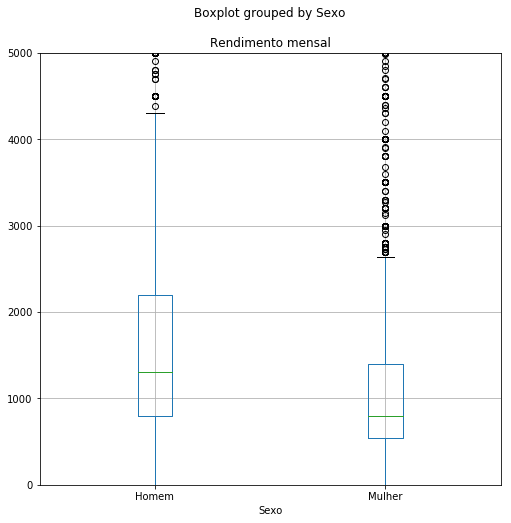

In [17]:
#RENDA MENSAL HOMENS x MULHERES - 2011

DFALL.boxplot("Rendimento mensal", by="Sexo", figsize=(8,8))
plt.ylim(0,5000)

A faixa de valores de renda mensal dos homens, concentrada na maior incidência, é quase duas vezes maior que a das mulheres. Mesmo sendo maior, grande parte está concentrada acima da renda mensal de maior incidência das mulheres.

In [18]:
#Mulheres (descrição da renda) - 2011
DFALL['Rendimento mensal'][DFALL['Sexo']=='Mulher'].describe()

count     3766.000000
mean      1251.479819
std       1402.321834
min          0.000000
25%        545.000000
50%        800.000000
75%       1400.000000
max      24000.000000
Name: Rendimento mensal, dtype: float64

In [19]:
#Homens (descrição da renda) - 2011
DFALL['Rendimento mensal'][DFALL['Sexo']=='Homem'].describe()

count     3008.000000
mean      1930.243351
std       2031.232173
min          0.000000
25%        800.000000
50%       1300.000000
75%       2200.000000
max      31000.000000
Name: Rendimento mensal, dtype: float64

A renda mensal média masculina é de, aproximadamente, 700 reais a mais que a feminina.

In [80]:
#Salária mínimo em 2011 = 545 - 2011
faixa = arange(0,5000,545)

In [78]:
#Frequência relativa por salário mínimo - mulheres 2011
salMcat = pd.cut(DFALL['Rendimento mensal'][DFALL['Sexo']=='Mulher'], bins=faixa, right=False)
print('Frequências relativas:')
x1 = (salMcat.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(x1,'\n')

Frequências relativas:
[0, 545)        13.5
[545, 1090)     51.4
[1090, 1635)    18.4
[1635, 2180)     6.7
[2180, 2725)     3.9
[2725, 3270)     3.0
[3270, 3815)     1.1
[3815, 4360)     1.2
[4360, 4905)     0.7
Name: Rendimento mensal, dtype: float64 



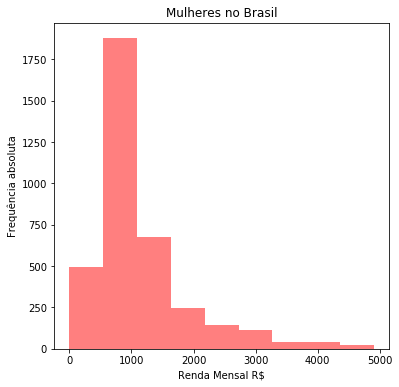

In [79]:
#GRÁFICO RENDA MENSAL (FREQ ABSOLTUTA) DAS MULHERES NO BRASIL - 2011

# pd.DataFrame([DFALL['Rendimento mensal'][DFALL['Sexo']=='Mulher'],salMcat]).T
DFALL['Rendimento mensal'][DFALL['Sexo']=='Mulher'].plot.hist(bins=faixa, title='Mulheres no Brasil', figsize=(6,6), color='red', alpha=0.5)
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda Mensal R$')
plt.show()

In [23]:
#Frequência relativa por salário mínimo - homens 2011
salHcat = pd.cut(DFALL['Rendimento mensal'][DFALL['Sexo']=='Homem'], bins=faixa, right=False)
print('Frequências relativas:')
x2 = (salMcat.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(x2,'\n')

Frequências relativas:
[0, 540)        13.3
[540, 1080)     51.4
[1080, 1620)    18.5
[1620, 2160)     6.7
[2160, 2700)     3.7
[2700, 3240)     3.2
[3240, 3780)     1.0
[3780, 4320)     1.3
[4320, 4860)     0.7
Name: Rendimento mensal, dtype: float64 



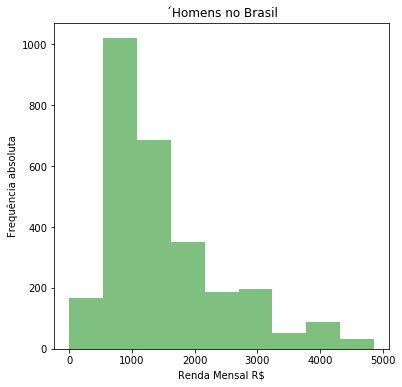

In [69]:
#GRÁFICO RENDA MENSAL (FREQ ABSOLTUTA) DOS HOMENS NO BRASIL - 2011

# pd.DataFrame([DFALL['Rendimento mensal'][DFALL['Sexo']=='Homem'],salHcat]).T
DFALL['Rendimento mensal'][DFALL['Sexo']=='Homem'].plot.hist(bins=faixa, title='´Homens no Brasil', figsize=(6,6), color='green', alpha=0.5)
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda Mensal R$')
plt.show()

In [70]:
#ENSINO POR REGIAO: NORDESTE - 2O11

ct=pd.crosstab(DFALL['Ensino'], DFALL['Região'], margins=True, rownames=['Ensino'], colnames=['Região'],normalize=True)*100
ct=ct.loc[["Regular do ensino médio ","Educação de jovens e adultos do ensino médio","Pré-vestibular","Superior, inclusive mestrado e doutorado"],['Nordeste']]
ct

Região,Nordeste
Ensino,
Regular do ensino médio,3.577158
Educação de jovens e adultos do ensino médio,1.331408
Pré-vestibular,0.112287
"Superior, inclusive mestrado e doutorado",16.361886


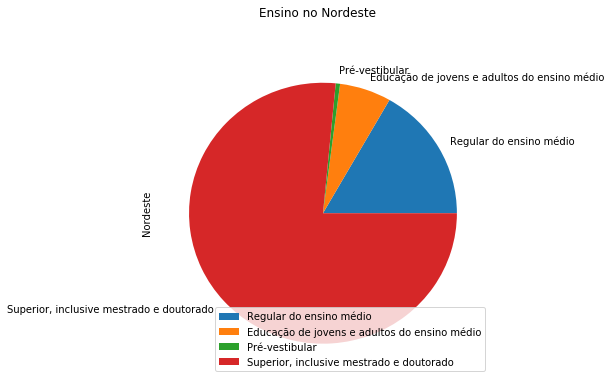

In [71]:
plot = ct.plot(kind='pie', stacked=True,title='Ensino no Nordeste',figsize=(6,6), subplots=True)
plt.legend(loc='lower right')

No Nordeste, mais de 50% das pessoas obtiveram ensino Superior.

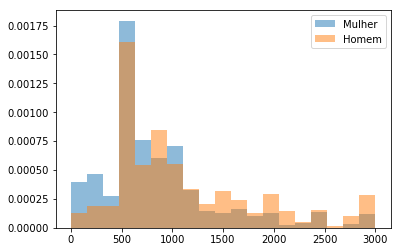

In [72]:
#RENDA HOMEM X MULHER NO NORDESTE - 2011

hm=DFALL['Rendimento mensal'].loc[(DFALL['Sexo']=="Mulher")&(DFALL['Região']=='Nordeste')]
hh = DFALL['Rendimento mensal'].loc[(DFALL['Sexo']=="Homem")&(DFALL['Região']=='Nordeste')]



bins = np.linspace(0,3000,20)

plt.hist(hm, bins, alpha=0.5, label='Mulher', normed=True)*100
plt.hist(hh, bins,alpha=0.5,label='Homem', normed=True)*100
plt.legend(loc='upper right')
plt.ylabel('')
plt.show()

É possível observar, de acordo com o histograma acima, que na área de menor renda as mulheres têm maior incidência, uma vez que os homens predominam a área de maiores rendas.

In [73]:
#ENSINO POR REGIAO: CENTROESTE - 2011

ct1=pd.crosstab(DFALL['Ensino'], DFALL['Região'], margins=True, rownames=['Ensino'], colnames=['Região'],normalize=True)*100
ct1=ct1.loc[["Regular do ensino médio ","Educação de jovens e adultos do ensino médio","Pré-vestibular","Superior, inclusive mestrado e doutorado"],['Centroeste']]
ct1

Região,Centroeste
Ensino,
Regular do ensino médio,1.716394
Educação de jovens e adultos do ensino médio,0.577478
Pré-vestibular,0.064164
"Superior, inclusive mestrado e doutorado",12.175168


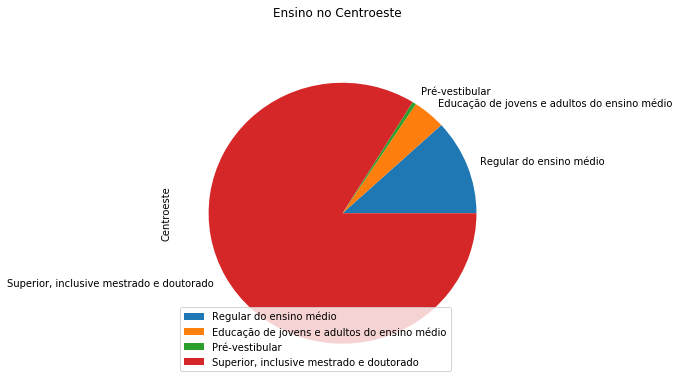

In [74]:
plot = ct1.plot(kind='pie', stacked=True,title='Ensino no Centroeste',figsize=(6,6), subplots=True)
plt.legend(loc='lower left')

No Centro Oeste, também, mais de 50% das pessoas possuem ensino superior.

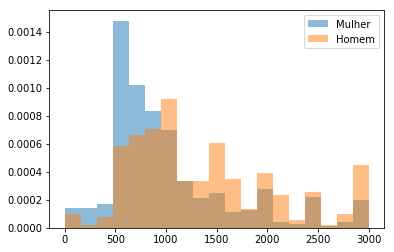

In [75]:
#RENDA HOMEM X MULHER NO CENTROESTE - 2011

hm=DFALL['Rendimento mensal'].loc[(DFALL['Sexo']=="Mulher")&(DFALL['Região']=='Centroeste')]
hh = DFALL['Rendimento mensal'].loc[(DFALL['Sexo']=="Homem")&(DFALL['Região']=='Centroeste')]



bins = np.linspace(0,3000,20)

plt.hist(hm, bins, alpha=0.5, label='Mulher', normed=True)*100
plt.hist(hh, bins,alpha=0.5,label='Homem', normed=True)*100
plt.legend(loc='upper right')
plt.ylabel('')
plt.show()

A discrepância entre os menores e maiores salários entre homens em mulheres é bem maior no Centro Oeste, como é possível observar no gráfico acima. Mais uma vez, os homens predominam a área das maiores rendas mensais.

In [32]:
#MÉDIA RENDA MENSAL CENTROESTE - 2015:
DFALL1['Rendimento mensal'][DFALL1['Região']=='Centroeste'].mean()

2502.740956826138

In [33]:
#MÉDIA RENDA MENSAL SUL - 2015:
DFALL1['Rendimento mensal'][DFALL1['Região']=='Sul'].mean()

2349.249080882353

In [34]:
#MÉDIA RENDA MENSAL SUDESTE - 2015
DFALL1['Rendimento mensal'][DFALL1['Região']=='Sudeste'].mean()

2236.0845518118244

In [35]:
#MÉDIA RENDA MENSAL NORTE - 2015:
DFALL1['Rendimento mensal'][DFALL1['Região']=='Norte'].mean()

1658.0143815915628

In [36]:
#MÉDIA RENDA MENSAL NORDESTE - 2015:
DFALL1['Rendimento mensal'][DFALL1['Região']=='Nordeste'].mean()

1518.8594276094277

No ano de 2015, o Centro Oeste ainda ocupa a posição de região com a maior renda mensal, e o Nordeste continua em última posição. Porém, a diferença entre as duas regiões caiu para 500 reais.

In [37]:
#DESCRIÇÃO DA RENDA MENSAL NO BRASIL - 2015
DFALL1["Rendimento mensal"].describe()

count     6249.000000
mean      2014.998560
std       2105.900143
min          0.000000
25%        900.000000
50%       1435.000000
75%       2300.000000
max      35000.000000
Name: Rendimento mensal, dtype: float64

A diferença entre a renda mensal brasileira e das regiões de maior e menor número aumentou para 500 reais, a mais e a menos.

(0, 7000)

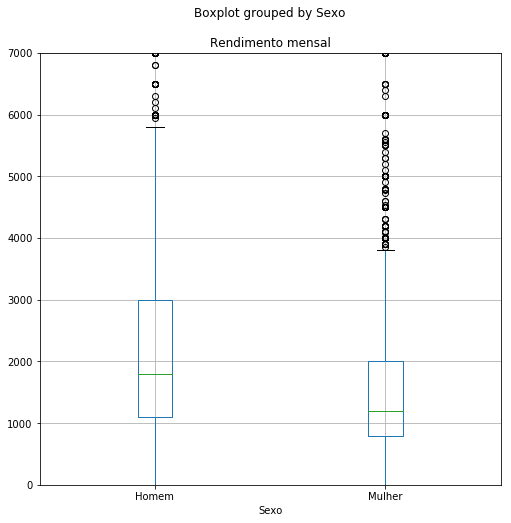

In [38]:
#RENDA MENSAL HOMENS x MULHERES - 2015

DFALL1.boxplot("Rendimento mensal", by="Sexo", figsize=(8,8))
plt.ylim(0,7000)

As mulheres continuam com a faixa salarial de maior incidência menor que a dos homens. O salário dos indivíduos do sexo masculino podem estar chegando a 3000, quando os do sexo feminino estarão chegando a 2000. (A reportagem da Globo nos aponta exatamente essa desigualdade)

In [39]:
#Mulheres (descrição da renda) - 2015
DFALL1['Rendimento mensal'][DFALL1['Sexo']=='Mulher'].describe()

count     3373.000000
mean      1652.477023
std       1713.708006
min          0.000000
25%        788.000000
50%       1200.000000
75%       2000.000000
max      25000.000000
Name: Rendimento mensal, dtype: float64

In [40]:
#Homens (descrição da renda) - 2015
DFALL1['Rendimento mensal'][DFALL1['Sexo']=='Homem'].describe()#faixas

count     2876.000000
mean      2440.167246
std       2420.397209
min          0.000000
25%       1100.000000
50%       1800.000000
75%       3000.000000
max      35000.000000
Name: Rendimento mensal, dtype: float64

A diferença da renda mensal média entre homens e mulheres quase duplicou (1200 reais de diferença).

In [41]:
#Salária mínimo em 2015 = 788
faixa1 = arange(0,6000,788)

In [42]:
#Frequência relativa por salário mínimo - mulheres 2015
salMcat1 = pd.cut(DFALL1['Rendimento mensal'][DFALL1['Sexo']=='Mulher'], bins=faixa1, right=False)
print('Frequências relativas:')
y1 = (salMcat1.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(y1,'\n')

Frequências relativas:
[0, 788)        13.7
[788, 1576)     55.7
[1576, 2364)    16.4
[2364, 3152)     7.9
[3152, 3940)     2.4
[3940, 4728)     2.3
[4728, 5516)     1.6
Name: Rendimento mensal, dtype: float64 



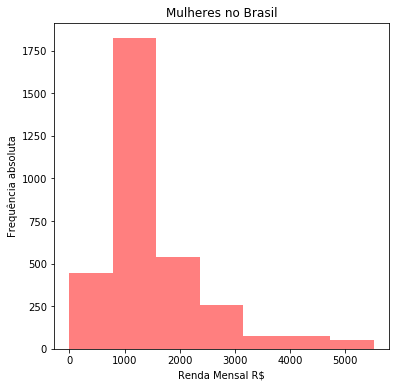

In [43]:
#GRÁFICO RENDA MENSAL (FREQ ABSOLTUTA) DAS MULHERES NO BRASIL - 2015

# pd.DataFrame([DFALL['Rendimento mensal'][DFALL['Sexo']=='Mulher'],salMcat]).T
DFALL1['Rendimento mensal'][DFALL1['Sexo']=='Mulher'].plot.hist(bins=faixa1, title='Mulheres no Brasil', figsize=(6,6), color='red', alpha=0.5)
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda Mensal R$')
plt.show()

In [44]:
#Frequência relativa por salário mínimo - homens 2015
salHcat1 = pd.cut(DFALL1['Rendimento mensal'][DFALL1['Sexo']=='Homem'], bins=faixa1, right=False)
print('Frequências relativas:')
y2 = (salMcat.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(y2,'\n')

Frequências relativas:
[0, 540)        13.3
[540, 1080)     51.4
[1080, 1620)    18.5
[1620, 2160)     6.7
[2160, 2700)     3.7
[2700, 3240)     3.2
[3240, 3780)     1.0
[3780, 4320)     1.3
[4320, 4860)     0.7
Name: Rendimento mensal, dtype: float64 



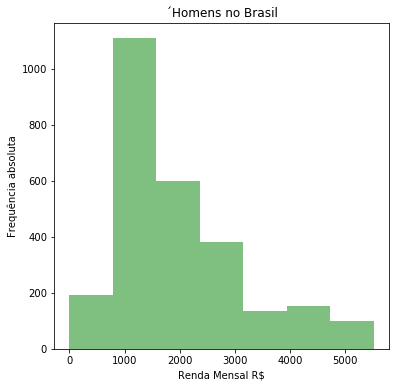

In [45]:
#GRÁFICO RENDA MENSAL (FREQ ABSOLTUTA) DOS HOMENS NO BRASIL - 2015

# pd.DataFrame([DFALL['Rendimento mensal'][DFALL['Sexo']=='Homem'],salHcat]).T
DFALL1['Rendimento mensal'][DFALL1['Sexo']=='Homem'].plot.hist(bins=faixa1, title='´Homens no Brasil', figsize=(6,6), color='green', alpha=0.5)
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda Mensal R$')
plt.show()

In [46]:
#ENSINO POR REGIAO: NORDESTE - 2O15

ct2=pd.crosstab(DFALL1['Ensino'], DFALL1['Região'], margins=True, rownames=['Ensino'], colnames=['Região'],normalize=True)*100
ct2=ct2.loc[["Regular do ensino médio ","Educação de jovens e adultos do ensino médio","Pré-vestibular","Superior, inclusive mestrado e doutorado"],['Nordeste']]
ct2

Região,Nordeste
Ensino,
Regular do ensino médio,1.617673
Educação de jovens e adultos do ensino médio,0.834928
Pré-vestibular,0.000000
"Superior, inclusive mestrado e doutorado",18.211863


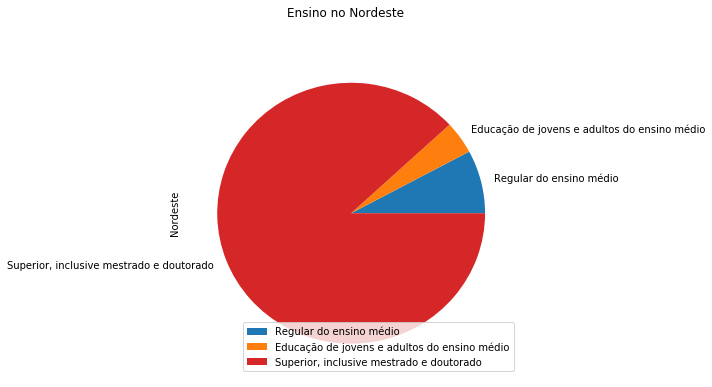

In [47]:
plot = ct2.plot(kind='pie', stacked=True,title='Ensino no Nordeste',figsize=(6,6), subplots=True)
plt.legend(loc='lower right')

O número de pessoas com ensino superior no nordeste permanece predominante.

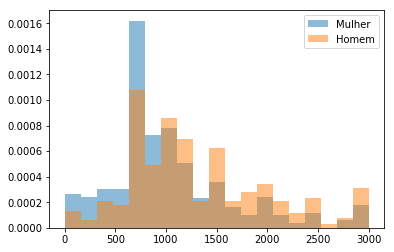

In [48]:
#RENDA HOMEM X MULHER NO NORDESTE - 2015

hm1=DFALL1['Rendimento mensal'].loc[(DFALL1['Sexo']=="Mulher")&(DFALL1['Região']=='Nordeste')]
hh1 = DFALL1['Rendimento mensal'].loc[(DFALL1['Sexo']=="Homem")&(DFALL1['Região']=='Nordeste')]



bins = np.linspace(0,3000,20)

plt.hist(hm1, bins, alpha=0.5, label='Mulher', normed=True)*100
plt.hist(hh1, bins,alpha=0.5,label='Homem', normed=True)*100
plt.legend(loc='upper right')
plt.ylabel('')
plt.show()

Comparado com o histograma da região Nordeste de 2011, percebe-se um aumento na densidade da diferença da renda entre homens e mulheres nos maiores valores.

In [49]:
#ENSINO POR REGIAO: CENTROESTE - 2015

ct3=pd.crosstab(DFALL1['Ensino'], DFALL1['Região'], margins=True, rownames=['Ensino'], colnames=['Região'],normalize=True)*100
ct3=ct3.loc[["Regular do ensino médio ","Educação de jovens e adultos do ensino médio","Pré-vestibular","Superior, inclusive mestrado e doutorado"],['Centroeste']]
ct3

Região,Centroeste
Ensino,
Regular do ensino médio,0.817533
Educação de jovens e adultos do ensino médio,0.765350
Pré-vestibular,0.034789
"Superior, inclusive mestrado e doutorado",13.289268


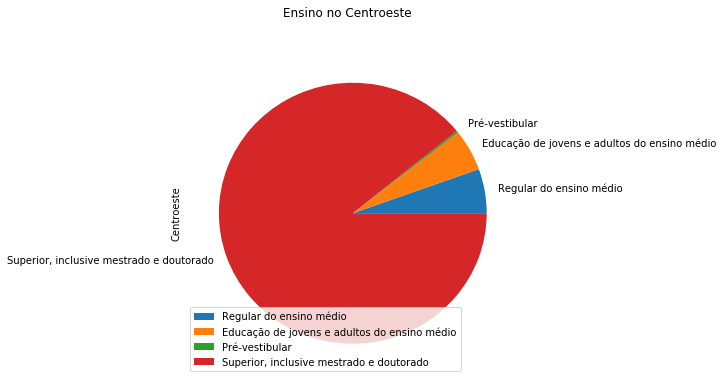

In [50]:
plot = ct3.plot(kind='pie', stacked=True,title='Ensino no Centroeste',figsize=(6,6), subplots=True)
plt.legend(loc='lower left')

O número de pessoas com ensino superior no Centro Oestre permanece predominante.

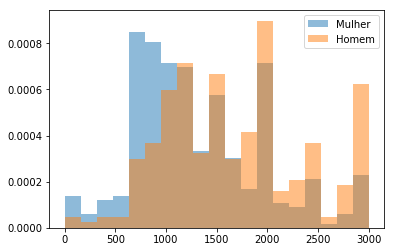

In [51]:
#RENDA HOMEM X MULHER NO CENTROESTE - 2015

hm1=DFALL1['Rendimento mensal'].loc[(DFALL1['Sexo']=="Mulher")&(DFALL1['Região']=='Centroeste')]
hh1 = DFALL1['Rendimento mensal'].loc[(DFALL1['Sexo']=="Homem")&(DFALL1['Região']=='Centroeste')]



bins = np.linspace(0,3000,20)

plt.hist(hm1, bins, alpha=0.5, label='Mulher', normed=True)*100
plt.hist(hh1, bins,alpha=0.5,label='Homem', normed=True)*100
plt.legend(loc='upper right')
plt.ylabel('')
plt.show()

Comparado com o histograma da região do Centro Oeste brasileiro de 2011, a maior densidade nos intervalos de maior renda permanecem predominantes aos homens.

___
## Conclusão 

A análise do projeto nos faz concluir que existe uma grande desvalorização do trabalho feminino no Brasil.

De acordo com pesquisas feitas, as mulheres possuem nível de ensino mais altos que indivíduos do sexo masculino. Inclusive, tendem a trabalhar mais horas por dia do que os homens, devido a dupla jornada. Mesmo assim, sua renda mensal é inferior à dos homens. Essa situação pode se mostrar ainda mais crítica para mulheres negras, imigrantes e mães.

Observando os gráficos, tabelas, e dados apresentados nesse trabalho, foi possível notar, que de 2011 para 2015, a desigualdade aumentou. A renda média das mulheres, em 2011, apresentava uma valor inferior à 700 reais da renda dos homens. Já em 2015, essa diferença aumentou para 1200.

Fazendo a mesma análise nas regiões de maior e menor renda do Brasil, essa discrepância se mostra ainda maior. No Centro Oeste (região de valores salariais mensais mais altos) a diferença é bem maior do que no Nordeste (valores mais baixos). E, em todo momento, os homens recebem os valores mais altos podendo chegar à quase 6000 reais e as mulheres à quase 4000 (em 2015).

Pesquisas mais atuais mostram que essa desigualdade salarial permanece. Porém, maiores intervenções estão acontecendo nesse meio, tornando cada vez mais questionável a desvalorização do trabalho da mulher.

Foi utilizado como apoio para o projeto as seguintes reportagens: 

https://g1.globo.com/economia/noticia/diferenca-de-salario-medio-de-homens-e-mulheres-pode-chegar-a-quase-r-1-mil-no-pais-aponta-ibge.ghtml

https://veja.abril.com.br/educacao/mesmo-com-nivel-de-escolaridade-mais-alto-mulheres-ganham-menos-que-os-homens/

http://meusalario.uol.com.br/main/salario-e-renda/igualdade-de-pagamentos/diferenca-salarial-entre-generos-perguntas-frequentes

http://agenciabrasil.ebc.com.br/geral/noticia/2017-03/mulheres-trabalham-75-horas-mais-que-homens-devido-dupla-jornada

http://www.guiatrabalhista.com.br/guia/salario_minimo.htm

http://www.meunegociobrilhante.com.br/primeiros-passos/derrube-mitos/desigualdade-salarial/

https://g1.globo.com/economia/concursos-e-emprego/noticia/mulheres-ganham-menos-do-que-os-homens-em-todos-os-cargos-diz-pesquisa.ghtml